<a href="https://colab.research.google.com/github/bmustafa225/DS-Portfollio/blob/main/yeg_property_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The purpose of this lab is to explore the property data provided by the City of Edmonton, for the sole purpose of showcasing and practicing various EDA techniques; as well as building a predictive price model to predict the assessed value of the property with the given variables. We also generate a map of Edmonton with the various properties listed to get an idea of the picture that the data presents!**



In [1]:
!pip3 install folium
!pip3 install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=c9c211d1875d6b9b1629bb827c76cb6201a5b7bb5b1383d387b6a212029b1a1e
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


### EDA

**Upload data and relevant packages**

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import MousePosition
from folium.features import DivIcon

In [3]:
yeg_df=pd.read_csv('yeg_property.csv')
print(yeg_df.columns)
yeg_df.head()

Index(['Account Number', 'Suite', 'House Number', 'Street Name', 'Garage',
       'Neighbourhood ID', 'Neighbourhood', 'Ward', 'Assessed Value',
       'Latitude', 'Longitude', 'Point Location', 'Assessment Class % 1',
       'Assessment Class % 2', 'Assessment Class % 3', 'Assessment Class 1',
       'Assessment Class 2', 'Assessment Class 3'],
      dtype='object')


Account Number Suite  House Number           Street Name Garage  \
0         1194679   NaN        8804.0    MEADOWLARK ROAD NW      Y   
1         1034321   NaN       11020.0      JASPER AVENUE NW      N   
2         1114974   NaN       14902.0  RIO TERRACE DRIVE NW      Y   
3         1012293   NaN       15112.0          45 AVENUE NW      Y   
4         1191535   NaN       17528.0          94 STREET NW      Y   

   Neighbourhood ID    Neighbourhood                 Ward  Assessed Value  \
0            4310.0  MEADOWLARK PARK   sipiwiyiniwak Ward          305500   
1            1150.0           OLIVER       O-day'min Ward        62112000   
2            4430.0      RIO TERRACE   sipiwiyiniwak Ward          842000   
3            5340.0   RAMSAY HEIGHTS       pihêsiwin Ward          292000   
4            2450.0       LAGO LINDO  tastawiyiniwak Ward          347500   

    Latitude   Longitude                                  Point Location  \
0  53.521347 -113.596600   POINT (-113.59659970742774 53.52134664342154)   
1  53.541279 -113.511435  POINT (-113.51143504606169 53.541279206311984)   
2  53.507602 -113.578589   POINT (-113.57858852769932 53.50760246690828)   
3  53.484560 -113.581913   POINT (-113.58191288991183 53.48456049274555)   
4  53.638352 -113.487062  POINT (-113.48706223339036 53.638351849064755)   

   Assessment Class % 1  Assessment Class % 2  Assessment Class % 3  \
0                   100                   NaN                   NaN   
1                    95                   5.0                   NaN   
2                   100                   NaN                   NaN   
3                   100                   NaN                   NaN   
4                   100                   NaN                   NaN   

  Assessment Class 1 Assessment Class 2 Assessment Class 3  
0        RESIDENTIAL                NaN                NaN  
1  OTHER RESIDENTIAL         COMMERCIAL                NaN  
2        RESIDENTIAL                NaN                NaN  
3        RESIDENTIAL                NaN                NaN  
4        RESIDENTIAL                NaN                NaN

**Remove unnecessary identifiers and columns**

In [4]:
yeg_df.drop(['Account Number', 'Suite', 'House Number'],axis=1,inplace=True)
yeg_df.head()

Street Name Garage  Neighbourhood ID    Neighbourhood  \
0    MEADOWLARK ROAD NW      Y            4310.0  MEADOWLARK PARK   
1      JASPER AVENUE NW      N            1150.0           OLIVER   
2  RIO TERRACE DRIVE NW      Y            4430.0      RIO TERRACE   
3          45 AVENUE NW      Y            5340.0   RAMSAY HEIGHTS   
4          94 STREET NW      Y            2450.0       LAGO LINDO   

                  Ward  Assessed Value   Latitude   Longitude  \
0   sipiwiyiniwak Ward          305500  53.521347 -113.596600   
1       O-day'min Ward        62112000  53.541279 -113.511435   
2   sipiwiyiniwak Ward          842000  53.507602 -113.578589   
3       pihêsiwin Ward          292000  53.484560 -113.581913   
4  tastawiyiniwak Ward          347500  53.638352 -113.487062   

                                   Point Location  Assessment Class % 1  \
0   POINT (-113.59659970742774 53.52134664342154)                   100   
1  POINT (-113.51143504606169 53.541279206311984)                    95   
2   POINT (-113.57858852769932 53.50760246690828)                   100   
3   POINT (-113.58191288991183 53.48456049274555)                   100   
4  POINT (-113.48706223339036 53.638351849064755)                   100   

   Assessment Class % 2  Assessment Class % 3 Assessment Class 1  \
0                   NaN                   NaN        RESIDENTIAL   
1                   5.0                   NaN  OTHER RESIDENTIAL   
2                   NaN                   NaN        RESIDENTIAL   
3                   NaN                   NaN        RESIDENTIAL   
4                   NaN                   NaN        RESIDENTIAL   

  Assessment Class 2 Assessment Class 3  
0                NaN                NaN  
1         COMMERCIAL                NaN  
2                NaN                NaN  
3                NaN                NaN  
4                NaN                NaN

In [5]:
yeg_df['Ward']=yeg_df['Ward'].str.replace('Ward','')
pd.unique(yeg_df['Assessment Class 2'])

array([nan, 'COMMERCIAL', 'RESIDENTIAL', 'FARMLAND', 'OTHER RESIDENTIAL'],
      dtype=object)

In [6]:
yeg_df['Assessment Class % 2']=yeg_df['Assessment Class % 2'].fillna(0)
yeg_df['Assessment Class % 3']=yeg_df['Assessment Class % 3'].fillna(0)
yeg_df.shape

(416014, 15)

**Obtain a breakdown of the assessed classes of the properties based on the mean Assessed Value of each class**

In [7]:
pie_df=yeg_df.groupby(['Assessment Class 1'])['Assessed Value'].mean().sort_values(ascending=False)

pie_df.plot.pie(x='Assessment Class 1',y='Assessed Value',legend=True,figsize=(12,12))

Classify data in to residential vs commercial

In [8]:
#residential data filter
res_df=yeg_df[(yeg_df['Assessment Class 1'] =='RESIDENTIAL') | (yeg_df['Assessment Class 1'] =='OTHER RESIDENTIAL')|(yeg_df['Assessment Class 2'] =='RESIDENTIAL')]
res_df=res_df[res_df['Assessment Class % 1'] == 100]

#commercial data filter
comm_df=yeg_df[(yeg_df['Assessment Class 1'] =='COMMERCIAL') | (yeg_df['Assessment Class 2'] =='COMMERCIAL')]
comm_df=comm_df[comm_df['Assessment Class % 1'] == 100]


In [9]:
print(res_df.shape)
comm_df.shape

(392230, 15)


(22175, 15)

**The colde below is to determine which neighbourhood has the highest number of properties**

In [10]:
res_df.groupby(['Neighbourhood'])['Garage'].count().nlargest(n=20)

Neighbourhood
OLIVER               11570
DOWNTOWN              9530
WINDERMERE            6079
RUTHERFORD            5476
SUMMERSIDE            5221
SOUTH TERWILLEGAR     5121
WALKER                5050
CHAPPELLE AREA        4483
THE HAMPTONS          4474
LAUREL                4299
STRATHCONA            4005
MCCONACHIE            3911
AMBLESIDE             3744
WESTMOUNT             3439
QUEEN MARY PARK       3187
GARNEAU               3150
ALLARD                3132
MACEWAN               3044
GLASTONBURY           2959
SECORD                2910
Name: Garage, dtype: int64

In [11]:
comm_df.groupby(['Neighbourhood'])['Garage'].count().nlargest(n=20)

Neighbourhood
DOWNTOWN                           781
STRATHCONA INDUSTRIAL PARK         632
CORONET INDUSTRIAL                 464
ELLERSLIE INDUSTRIAL               410
MISTATIM INDUSTRIAL                410
WINDERMERE                         387
MCCAULEY                           342
OLIVER                             330
STRATHCONA                         315
PARSONS INDUSTRIAL                 309
SOUTHEAST INDUSTRIAL               286
WINTERBURN INDUSTRIAL AREA EAST    283
BOYLE STREET                       276
QUEEN ALEXANDRA                    262
PYLYPOW INDUSTRIAL                 250
KENNEDALE INDUSTRIAL               245
WESTMOUNT                          236
GLENWOOD                           225
CLOVER BAR AREA                    220
WILSON INDUSTRIAL                  209
Name: Garage, dtype: int64

**Next, the residential and commercial neighbourhoods with the highest mean Assessed Value were determned**

In [12]:
res_garage=res_df.groupby(['Neighbourhood'])[['Garage']].count().reset_index()['Garage']
weight_garage_res=res_garage/sum(res_garage)
weight_garage_res

com_garage=comm_df.groupby(['Neighbourhood'])['Garage'].count().reset_index()['Garage']
weight_garage_comm=com_garage/sum(com_garage)


In [13]:
#map_df=yeg_df[['Neighbourhood ID', 'Neighbourhood', 'Ward', 'Assessed Value','Latitude', 'Longitude','Garage','Assessment Class % 1','Assessment Class % 2', 'Assessment Class % 3']].sample(80000)
#neigh_df=map_df[('Assessment Class 1' =='RESIDENTIAL') or('Assessment Class 1' ==' OTHER RESIDENTIAL')]
#yeg_df[(yeg_df['Neighbourhood']== 'UNIVERSITY OF ALBERTA') & (yeg_df['Assessment Class 1']== 'OTHER RESIDENTIAL')]

top_res_neigh=res_df.groupby(['Neighbourhood'])['Assessed Value'].mean().nlargest(n=10).reset_index()
top_res_neigh['Weighted Value']=top_res_neigh['Assessed Value']*weight_garage_res
top_res_neigh.sort_values(by='Weighted Value',inplace=True,ascending=False)


weights were added to both DF in order to extract the true represnetation and value of the neighbourhoods; weight= w/sum(w)

In [14]:
top_comm=comm_df.groupby(['Neighbourhood'])['Assessed Value'].mean().nlargest(n=10).reset_index()
top_comm['Weighted Value']=top_comm['Assessed Value']*weight_garage_comm
top_comm.sort_values(by='Weighted Value',inplace=True,ascending=False)
top_comm

Neighbourhood  Assessed Value  Weighted Value
2                   MILL WOODS PARK    1.512960e+07   118722.395598
7        UNIVERSITY OF ALBERTA FARM    1.169433e+07    64868.900514
3  HERITAGE VALLEY TOWN CENTRE AREA    1.500350e+07    50746.933345
1              WEST MEADOWLARK PARK    2.773535e+07    31270.124921
6                     SPRUCE AVENUE    1.267664e+07    27441.085880
0             UNIVERSITY OF ALBERTA    6.632604e+07    26920.463392
4               SUNWAPTA INDUSTRIAL    1.490204e+07    22177.648533
5       RURAL NORTH EAST HORSE HILL    1.355461e+07    16504.667629
8             SOUTH EDMONTON COMMON    1.084227e+07    11246.149065
9                        TERRA LOSA    1.061259e+07     3828.840348

**A bar plot for both residential and commercial neighbourhoods was generated**

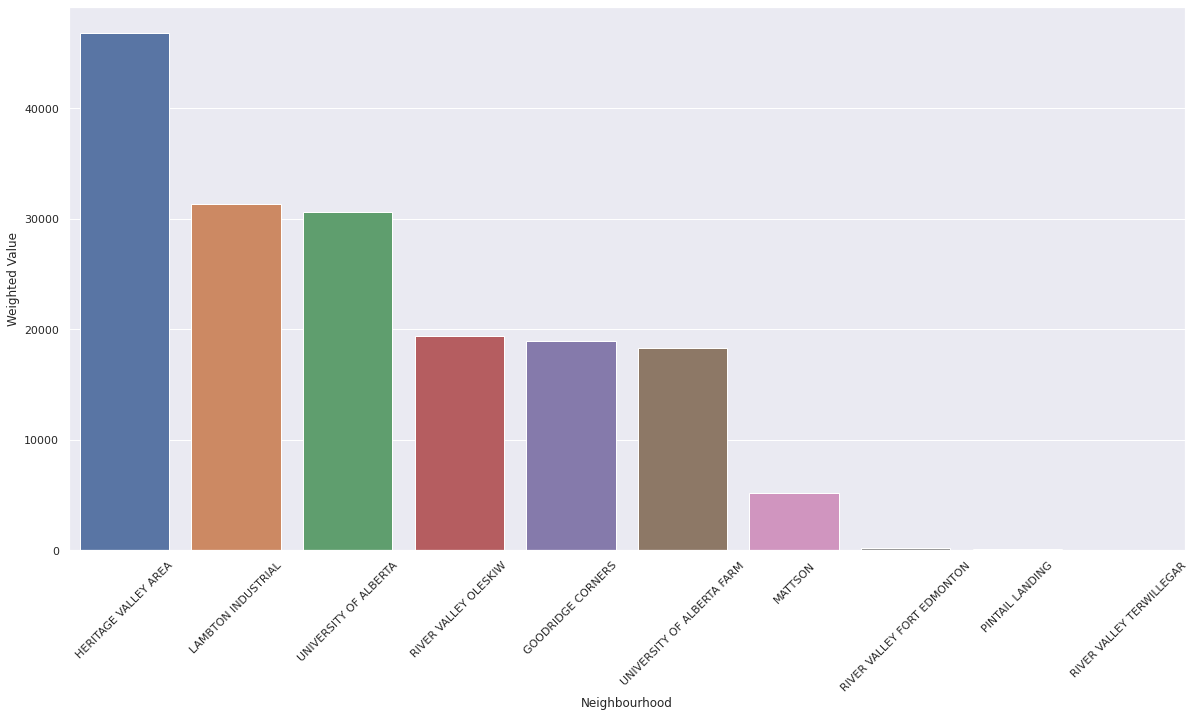

In [15]:
sns.set(rc={'figure.figsize':(20,10)})
bar=sns.barplot(x='Neighbourhood',y='Weighted Value',data=top_res_neigh)
for item in bar.get_xticklabels():
    item.set_rotation(45)


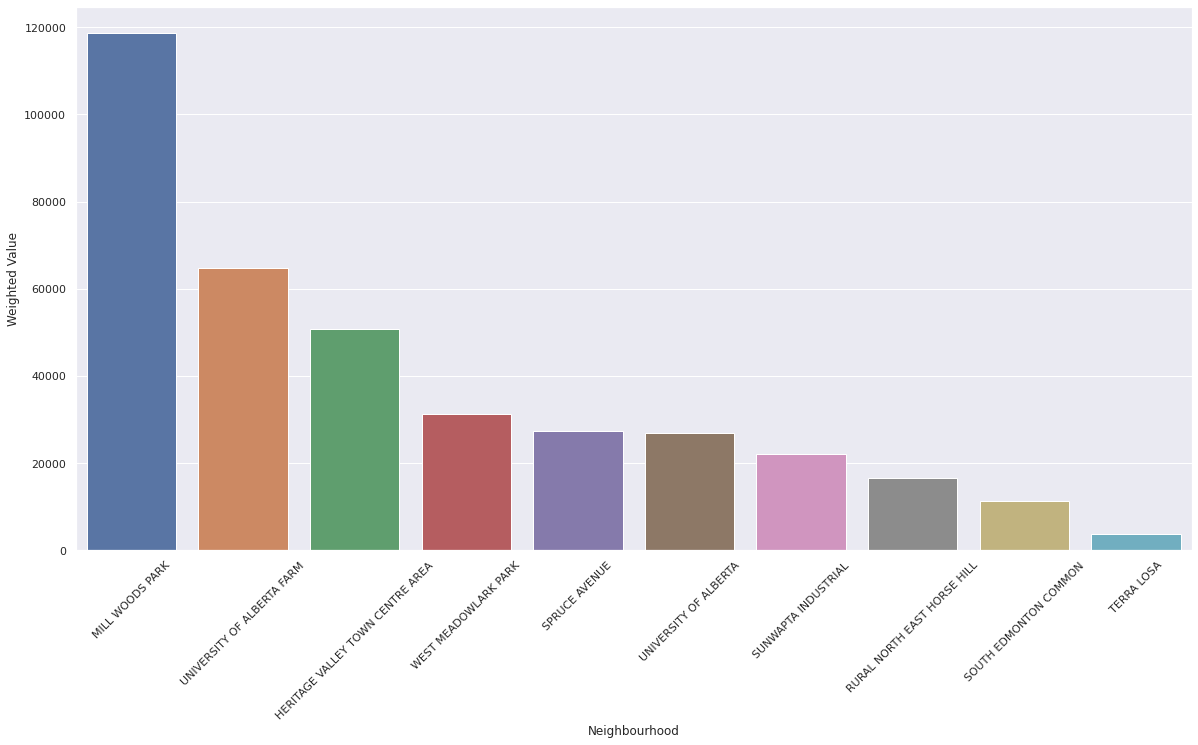

In [16]:
sns.set(rc={'figure.figsize':(20,10)})
bar=sns.barplot(x='Neighbourhood',y='Weighted Value',data=top_comm)
for item in bar.get_xticklabels():
    item.set_rotation(45)


In [17]:
top_res_neigh['Weighted Value'].hist()

The data was then filtered and then transformed to scale the assessed value, so we can plot the location of the properties on a map of Edmonton to get a better overall picture. The Weights column was also added to improve the accuracy of the findings.

In [18]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
res_loc=res_df.groupby(['Neighbourhood'])[['Latitude','Longitude','Assessed Value']].mean().reset_index()


scaled_col=scale.fit_transform(res_loc.select_dtypes(include='float64'))
res_loc['Assessed Value']=scaled_col
res_loc['Weight']=weight_garage_res
res_loc

Neighbourhood   Latitude   Longitude  Assessed Value  \
0                       ABBOTTSFIELD  53.575179 -113.390262        0.742295   
1                             ALBANY  53.629756 -113.555668        1.532301   
2                     ALBERTA AVENUE  53.568410 -113.485053        0.644310   
3                         ALDERGROVE  53.516683 -113.640756       -0.104438   
4                             ALLARD  53.400861 -113.528908       -1.780959   
..                               ...        ...         ...             ...   
343                     WINDSOR PARK  53.524566 -113.534756        0.009674   
344  WINTERBURN INDUSTRIAL AREA EAST  53.565769 -113.665856        0.606093   
345  WINTERBURN INDUSTRIAL AREA WEST  53.545089 -113.703119        0.306740   
346                        WOODCROFT  53.566832 -113.556646        0.621478   
347                             YORK  53.603279 -113.431459        1.149051   

       Weight  
0    0.000964  
1    0.002585  
2    0.006063  
3    0.004077  
4    0.007985  
..        ...  
343  0.001514  
344  0.000005  
345  0.000010  
346  0.001994  
347  0.002868  

[348 rows x 5 columns]

In [19]:
res_loc['Assessed Value'].hist()

We do the same for the commercial properties.

In [20]:
scale=StandardScaler()
comm_loc=comm_df.groupby(['Neighbourhood'])[['Latitude','Longitude','Assessed Value']].mean().reset_index()


scaled_col=scale.fit_transform(comm_loc.select_dtypes(include='float64'))
comm_loc['Assessed Value']=scaled_col
comm_loc['Weight']=weight_garage_comm
comm_loc

Neighbourhood   Latitude   Longitude  Assessed Value    Weight
0                ABBOTTSFIELD  53.574297 -113.391304        0.741098  0.000406
1                      ALBANY  53.631294 -113.550344        1.613480  0.001127
2              ALBERTA AVENUE  53.568335 -113.486800        0.649834  0.007847
3     ALBERTA PARK INDUSTRIAL  53.566116 -113.594852        0.615873  0.003382
4                  ALDERGROVE  53.516514 -113.641140       -0.143337  0.001488
..                        ...        ...         ...             ...       ...
394                 WOODCROFT  53.566703 -113.556383        0.624852  0.001398
395  YELLOWHEAD CORRIDOR EAST  53.581972 -113.463798        0.858571  0.008253
396  YELLOWHEAD CORRIDOR WEST  53.582881 -113.519193        0.872483  0.000271
397                      YORK  53.602968 -113.429056        1.179923  0.003337
398     YOUNGSTOWN INDUSTRIAL  53.550564 -113.612542        0.377839  0.002525

[399 rows x 5 columns]

In [21]:
yeg_coordinate=[53.5461,-113.4937]
yeg_map=folium.Map(location=yeg_coordinate,zoom_start=11)
yeg_map

The map below shows a bubble plot of the residential properties in Edmonton. 

In [22]:
yeg_coordinate=[53.5461,-113.4937]
yeg_map=folium.Map(location=yeg_coordinate,zoom_start=10)

for neigh,lat,long,value,weight in zip(res_loc.Neighbourhood,res_loc.Latitude,res_loc.Longitude,res_loc['Assessed Value'],res_loc.Weight):
  if value > (res_loc['Assessed Value'].median()):
    circle=folium.Circle(
      location=[lat,long],
      popup=neigh,
      radius=abs(value*100000*weight),
      color='green',
      fill=True,
      fill_color='green'
   )
  else:
    circle=folium.Circle(
      location=[lat,long],
      popup=neigh,
      radius=abs(value*100000*weight),
      color='crimson',
      fill=True,
      fill_color='crimson'
   )
  yeg_map.add_child(circle)
  
yeg_map

As is evident by the bubble plot, South Edmonton has the highest residential property values in Edmonton. Meanwhile, North Edmonton has the second highest 

In [23]:
yeg_coordinate=[53.5461,-113.4937]
yeg_map=folium.Map(location=yeg_coordinate,zoom_start=10)

for neigh,lat,long,value,weight in zip(comm_loc.Neighbourhood,comm_loc.Latitude,comm_loc.Longitude,comm_loc['Assessed Value'],comm_loc.Weight):
  if value > (comm_loc['Assessed Value'].median()):
    circle=folium.Circle(
      location=[lat,long],
      popup=neigh,
      radius=abs(value*100000*weight),
      color='green',
      fill=True,
      fill_color='green'
   )
  else:
    circle=folium.Circle(
      location=[lat,long],
      popup=neigh,
      radius=abs(value*100000*weight),
      color='crimson',
      fill=True,
      fill_color='crimson'
   )
  yeg_map.add_child(circle)
  
yeg_map

In [24]:
south_yeg=res_df.loc[res_df.Latitude< 53.518133]
south_yeg=south_yeg[['Neighbourhood','Latitude','Longitude','Assessed Value','Garage']]
south_yeg.head()

Neighbourhood   Latitude   Longitude  Assessed Value Garage
2      RIO TERRACE  53.507602 -113.578589          842000      Y
3   RAMSAY HEIGHTS  53.484560 -113.581913          292000      Y
10      SKYRATTLER  53.451067 -113.529489          170000      N
11        BEARSPAW  53.446537 -113.494391          408500      Y
13         ELMWOOD  53.517498 -113.603123          302500      Y

In [25]:
north_yeg=res_df.loc[res_df.Latitude > 53.518133]
north_yeg=north_yeg[['Neighbourhood','Latitude','Longitude','Assessed Value','Garage']]
north_yeg.head()

Neighbourhood   Latitude   Longitude  Assessed Value Garage
0       MEADOWLARK PARK  53.521347 -113.596600          305500      Y
4            LAGO LINDO  53.638352 -113.487062          347500      Y
5              SHERWOOD  53.531090 -113.582809          274500      Y
6              GLENWOOD  53.534265 -113.611761          379500      Y
7  WEST MEADOWLARK PARK  53.525041 -113.607880          335500      Y

In [26]:
print(south_yeg['Assessed Value'].mean())
north_yeg['Assessed Value'].mean()

376038.910871449


328185.25696687

In [27]:
south_loc=south_yeg.groupby(['Neighbourhood'])[['Latitude','Longitude','Assessed Value']].mean().reset_index()
north_loc=north_yeg.groupby(['Neighbourhood'])[['Latitude','Longitude','Assessed Value']].mean().reset_index()

weight_south=south_yeg.groupby('Neighbourhood')['Garage'].count().reset_index()['Garage']
weight_north=north_yeg.groupby('Neighbourhood')['Garage'].count().reset_index()['Garage']
south_loc['Weight']=weight_south/sum(weight_south)
north_loc['Weight']=weight_north/sum(weight_north)

south_scale=scale.fit_transform(south_loc.select_dtypes(include='float64'))
north_scale=scale.fit_transform(north_loc.select_dtypes(include='float64'))

#north_loc['Assessed Value']=north_scale
#south_loc['Assessed Value']=south_scale

In [28]:
print(south_loc.head(10))
north_loc.head(10)

                     Neighbourhood   Latitude   Longitude  Assessed Value  \
0                       ALDERGROVE  53.515489 -113.640354   298099.729242   
1                           ALLARD  53.400861 -113.528908   368698.914432   
2                        ALLENDALE  53.502760 -113.505688   455510.193680   
3                        AMBLESIDE  53.431063 -113.605656   294777.510684   
4                   ANTHONY HENDAY  53.514768 -113.660015   258400.000000   
5             ANTHONY HENDAY SOUTH  53.433127 -113.540596   304350.000000   
6  ANTHONY HENDAY SOUTH BLACKBURNE  53.437067 -113.503965    98863.636364   
7        ANTHONY HENDAY SOUTH EAST  53.436559 -113.422264   206718.750000   
8        ANTHONY HENDAY SOUTH WEST  53.483197 -113.649732   148035.714286   
9       ANTHONY HENDAY TERWILLEGAR  53.441143 -113.593420   234900.000000   

     Weight  
0  0.005784  
1  0.016349  
2  0.005121  
3  0.019544  
4  0.000026  
5  0.000104  
6  0.000115  
7  0.000167  
8  0.000219  
9  0.000078 

Neighbourhood   Latitude   Longitude  Assessed Value    Weight
0                ABBOTTSFIELD  53.575179 -113.390262   189947.089947  0.001884
1                      ALBANY  53.629756 -113.555668   218513.313609  0.005053
2              ALBERTA AVENUE  53.568410 -113.485053   249800.252313  0.011851
3                  ALDERGROVE  53.519376 -113.641665   430770.875764  0.002447
4              ANTHONY HENDAY  53.540828 -113.659232   259432.432432  0.000184
5     ANTHONY HENDAY BIG LAKE  53.590133 -113.647727   148333.333333  0.000105
6  ANTHONY HENDAY CASTLEDOWNS  53.645517 -113.517872   296000.000000  0.000065
7    ANTHONY HENDAY CLAREVIEW  53.616513 -113.357244    55272.727273  0.000055
8  ANTHONY HENDAY ENERGY PARK  53.641565 -113.418920   106421.052632  0.000095
9   ANTHONY HENDAY HORSE HILL  53.631051 -113.379495   177181.818182  0.000055

In [29]:
yeg_coordinate=[53.5461,-113.4937]
yeg_map=folium.Map(location=yeg_coordinate,zoom_start=11)
se_mean=south_loc.loc[south_loc.Longitude > -113.4937]['Assessed Value'].median()
sw_mean=south_loc.loc[south_loc.Longitude < -113.4937]['Assessed Value'].median()

for neigh,lat,long,value,weigh in zip(south_loc.Neighbourhood,south_loc.Latitude,south_loc.Longitude,south_loc['Assessed Value'],south_loc.Weight):
  if long <-113.4937:
    if value < (sw_mean*0.70):
     circle=folium.Circle(
        location=[lat,long],
        popup=(value,sw_mean),
        radius=abs(value*weigh/10),
        color='green',
        fill=True,
        fill_color='green'
    )
    elif value in range(int((sw_mean*7.80)),int((sw_mean*1.30)),1):
      circle=folium.Circle(
        location=[lat,long],
        popup=(value,se_mean),
        radius=abs(value*weigh/100),
        color='orange',
        fill=True,
        fill_color='orange'
    )
    else:
      circle=folium.Circle(
        location=[lat,long],
        popup=(value,sw_mean),
        radius=abs(value*weigh/10),
        color='crimson',
        fill=True,
        fill_color='crimson'
    )
  yeg_map.add_child(circle)
  
yeg_map

In [30]:
yeg_coordinate=[53.5461,-113.4937]
yeg_map=folium.Map(location=yeg_coordinate,zoom_start=11)

for neigh,lat,long,value,weigh in zip(south_loc.Neighbourhood,south_loc.Latitude,south_loc.Longitude,south_loc['Assessed Value'],south_loc.Weight):
  if long >-113.4937:
    if value < (se_mean*0.90):
     circle=folium.Circle(
        location=[lat,long],
        popup=(value,se_mean),
        radius=abs(value*weigh/10),
        color='green',
        fill=True,
        fill_color='green'
    )
    elif value in range(int((se_mean*0.90)),int((se_mean*1.10)),1):
      circle=folium.Circle(
        location=[lat,long],
        popup=(value,se_mean),
        radius=abs(value*weigh/10),
        color='orange',
        fill=True,
        fill_color='orange'
    )

    else:
      circle=folium.Circle(
        location=[lat,long],
        popup=(value,se_mean),
        radius=abs(value*weigh/10),
        color='crimson',
        fill=True,
        fill_color='crimson'
    )
  yeg_map.add_child(circle)
  
yeg_map

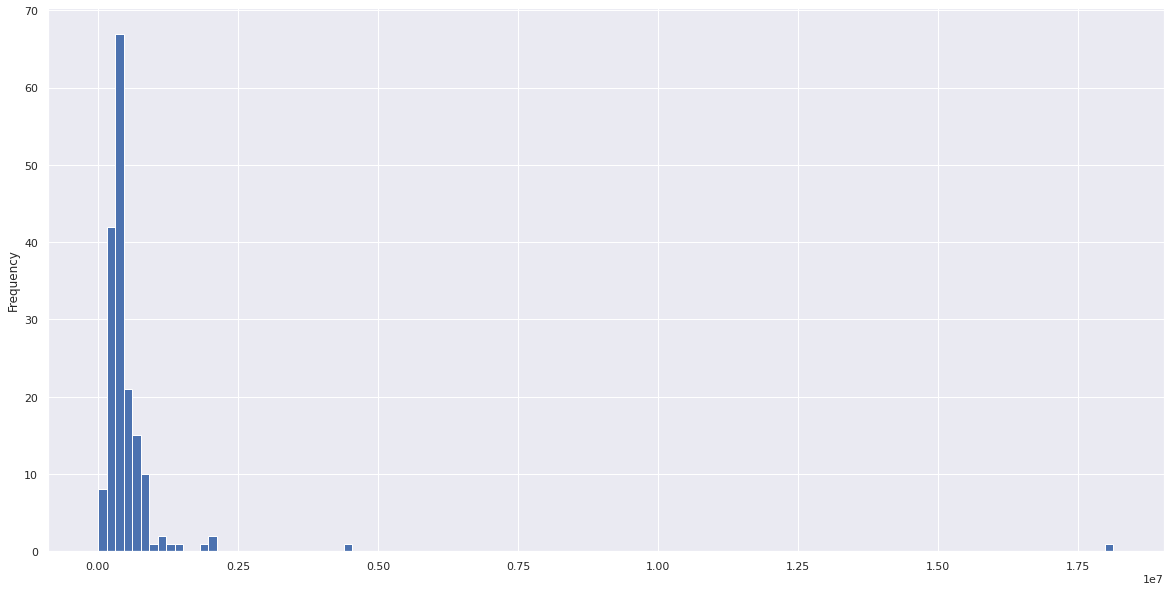

In [31]:
south_loc['Assessed Value'].plot(kind='hist',bins=120)

##GeoPandas Feature Engineering:
We will use the geopandas library to add more features to our dataset, the new information will include local schools and the distance of each property from the nearest school.

In [32]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 16.7 MB 461 kB/s 
     |████████████████████████████████| 6.3 MB 41.6 MB/s 


In [33]:
!pip install descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
!apt install libspatialindex-dev
!pip install rtree
!pip install pandas fiona shapely pyproj
!pip install pygeos


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 4 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 1s (678 kB/s)
Selecting previously unselected package libspatialindex4

In [35]:
import geopandas as geo
from shapely import wkt

yeg_school=geo.read_file('yeg_school.csv')
yeg_neighbourhood=geo.read_file('yeg_neighbourhood.csv')


#yeg_school
yeg_neighbourhood

Neighbourhood Name Neighbourhood Number          Descriptive Name  \
0                ABBOTTSFIELD                 2010              Abbottsfield   
1                      ALBANY                 3460                    Albany   
2              ALBERTA AVENUE                 1010            Alberta Avenue   
3     ALBERTA PARK INDUSTRIAL                 4010   Alberta Park Industrial   
4                  ALDERGROVE                 4020                Aldergrove   
..                        ...                  ...                       ...   
397                 WOODCROFT                 3450                 Woodcroft   
398  YELLOWHEAD CORRIDOR EAST                 1270  Yellowhead Corridor East   
399  YELLOWHEAD CORRIDOR WEST                 1280  Yellowhead Corridor West   
400                      YORK                 2720                      York   
401     YOUNGSTOWN INDUSTRIAL                 4660     Youngstown Industrial   

                                           Description Effective Start Date  \
0    Abbottsfield was once owned by E.F. Carey, one...                        
1                                                                             
2    One of the city's older residential neighbourh...                        
3    This non-residential neighbourhood is largely ...                        
4    Planned in the 1970s, this area's multi-family...                        
..                                                 ...                  ...   
397  Woodcroft contains Westmount Shopping Centre, ...                        
398  This non-residential neighbourhood is limited ...                        
399  This non-residential neighbourhood is limited ...                        
400  York is somewhat of a 'pioneer' neighbourhood....                        
401  Mostly Industrial, River Valley Parkland or co...                        

    Effective End Date                              Geometry Multipolygon  \
0                       MULTIPOLYGON (((-113.38763361949056 53.5761348...   
1                       MULTIPOLYGON (((-113.56024507936962 53.6316036...   
2                       MULTIPOLYGON (((-113.49225733739199 53.5766166...   
3                       MULTIPOLYGON (((-113.59041036545489 53.5665379...   
4                       MULTIPOLYGON (((-113.65208909985091 53.5195023...   
..                 ...                                                ...   
397                     MULTIPOLYGON (((-113.56570359212785 53.5690892...   
398                     MULTIPOLYGON (((-113.44511313954162 53.5836361...   
399                     MULTIPOLYGON (((-113.4919634148346 53.58476670...   
400                     MULTIPOLYGON (((-113.42930360543481 53.6068961...   
401                     MULTIPOLYGON (((-113.60517306547139 53.5559486...   

    geometry  
0       None  
1       None  
2       None  
3       None  
4       None  
..       ...  
397     None  
398     None  
399     None  
400     None  
401     None  

[402 rows x 8 columns]

In [36]:

school=yeg_school[['school_nam','sch_type','grades','sector','latitude','longitude','geometry_point']]
school.geometry_point=school.geometry_point.apply(wkt.loads)
school_df=geo.GeoDataFrame(school,crs="EPSG:3401",geometry='geometry_point')
school_df=school_df.replace('',np.nan)
school_df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


school_nam sch_type     grades         sector  \
0    Metro Continuing Ed.       SP        NaN  South Central   
1  Ellerslie Campus South       EL  K to Gr 6    Southeast 2   
2            John Barnett       EL  K to Gr 6          North   
3     Academy King Edward      EJS    Gr 2-12  South Central   
4             Overlanders       EL  K to Gr 6      Northeast   

             latitude            longitude           geometry_point  
0   53.51060108890162  -113.44817224024388  POINT (-113.448 53.511)  
1   53.42570048400404  -113.44103246802848  POINT (-113.441 53.426)  
2   53.60996075766575  -113.44997528057935  POINT (-113.450 53.610)  
3  53.521386646301934  -113.49028897487473  POINT (-113.490 53.521)  
4   53.58190795483427  -113.38948755765914  POINT (-113.389 53.582)

In [37]:
school_df

school_nam sch_type     grades         sector  \
0      Metro Continuing Ed.       SP        NaN  South Central   
1    Ellerslie Campus South       EL  K to Gr 6    Southeast 2   
2              John Barnett       EL  K to Gr 6          North   
3       Academy King Edward      EJS    Gr 2-12  South Central   
4               Overlanders       EL  K to Gr 6      Northeast   
..                      ...      ...        ...            ...   
218                 LaPerle       EL  K to Gr 6      Northwest   
219             Mee-Yah-Noh       EL  K to Gr 6          North   
220                  Ormsby       EL  K to Gr 6           West   
221            Alex Janvier       JR     Gr 4-9      Northwest   
222                Kirkness       EL  K to Gr 6      Northeast   

               latitude            longitude           geometry_point  
0     53.51060108890162  -113.44817224024388  POINT (-113.448 53.511)  
1     53.42570048400404  -113.44103246802848  POINT (-113.441 53.426)  
2     53.60996075766575  -113.44997528057935  POINT (-113.450 53.610)  
3    53.521386646301934  -113.49028897487473  POINT (-113.490 53.521)  
4     53.58190795483427  -113.38948755765914  POINT (-113.389 53.582)  
..                  ...                  ...                      ...  
218   53.53308706078817  -113.64561623810573  POINT (-113.646 53.533)  
219   53.58741149482911  -113.48384718633568  POINT (-113.484 53.587)  
220   53.49824824927933  -113.63844365082798  POINT (-113.638 53.498)  
221   53.53331959013051  -113.60987823905982  POINT (-113.610 53.533)  
222   53.61107088937004  -113.38754389054849  POINT (-113.388 53.611)  

[223 rows x 7 columns]

In [38]:
nhood=yeg_neighbourhood[['Neighbourhood Name','Geometry Multipolygon']]
nhood['Geometry Multipolygon']=nhood['Geometry Multipolygon'].apply(wkt.loads)
nhood_df=geo.GeoDataFrame(nhood,crs="EPSG:3401",geometry='Geometry Multipolygon')
nhood_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Neighbourhood Name                              Geometry Multipolygon
0             ABBOTTSFIELD  MULTIPOLYGON (((-113.388 53.576, -113.389 53.5...
1                   ALBANY  MULTIPOLYGON (((-113.560 53.632, -113.562 53.6...
2           ALBERTA AVENUE  MULTIPOLYGON (((-113.492 53.577, -113.492 53.5...
3  ALBERTA PARK INDUSTRIAL  MULTIPOLYGON (((-113.590 53.567, -113.590 53.5...
4               ALDERGROVE  MULTIPOLYGON (((-113.652 53.520, -113.652 53.5...

In [39]:
nhood_df.dtypes

Neighbourhood Name         object
Geometry Multipolygon    geometry
dtype: object

In [40]:
import rtree
import pygeos
from rtree import index
from rtree.index import Rtree
nhood_school_df=geo.sjoin(school_df,nhood_df,how='inner',op='within')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [41]:
nhood_school_df


school_nam sch_type     grades         sector  \
0      Metro Continuing Ed.       SP        NaN  South Central   
15                 Avonmore       EJ  K to Gr 9  South Central   
1    Ellerslie Campus South       EL  K to Gr 6    Southeast 2   
103        Ellerslie Campus       EJ  K to Gr 9    Southeast 2   
2              John Barnett       EL  K to Gr 6          North   
..                      ...      ...        ...            ...   
215              Jan Reimer       EJ  K to Gr 9    Southeast 2   
217               Crestwood       EJ  K to Gr 9      Northwest   
218                 LaPerle       EL  K to Gr 6      Northwest   
220                  Ormsby       EL  K to Gr 6           West   
222                Kirkness       EL  K to Gr 6      Northeast   

               latitude            longitude           geometry_point  \
0     53.51060108890162  -113.44817224024388  POINT (-113.448 53.511)   
15    53.51194884986729  -113.44850895430636  POINT (-113.449 53.512)   
1     53.42570048400404  -113.44103246802848  POINT (-113.441 53.426)   
103   53.42779920227966  -113.44149983586533  POINT (-113.441 53.428)   
2     53.60996075766575  -113.44997528057935  POINT (-113.450 53.610)   
..                  ...                  ...                      ...   
215  53.407575415006384   -113.4532144920475  POINT (-113.453 53.408)   
217   53.53493841830749  -113.57039785341547  POINT (-113.570 53.535)   
218   53.53308706078817  -113.64561623810573  POINT (-113.646 53.533)   
220   53.49824824927933  -113.63844365082798  POINT (-113.638 53.498)   
222   53.61107088937004  -113.38754389054849  POINT (-113.388 53.611)   

     index_right         Neighbourhood Name  
0             27                   AVONMORE  
15            27                   AVONMORE  
1             82               CHARLESWORTH  
103           82               CHARLESWORTH  
2            194                   KILKENNY  
..           ...                        ...  
215          362  THE ORCHARDS AT ELLERSLIE  
217           90                  CRESTWOOD  
218          202                   LA PERLE  
220          262               ORMSBY PLACE  
222          200                   KIRKNESS  

[223 rows x 9 columns]

In [42]:
nhood_school_df.drop(['index_right'],inplace=True,axis=1)
nhood_school_df=nhood_school_df.rename(columns={'Neighbourhood Name':'neighbourhood'})

In [43]:
nhood_school_df

school_nam sch_type     grades         sector  \
0      Metro Continuing Ed.       SP        NaN  South Central   
15                 Avonmore       EJ  K to Gr 9  South Central   
1    Ellerslie Campus South       EL  K to Gr 6    Southeast 2   
103        Ellerslie Campus       EJ  K to Gr 9    Southeast 2   
2              John Barnett       EL  K to Gr 6          North   
..                      ...      ...        ...            ...   
215              Jan Reimer       EJ  K to Gr 9    Southeast 2   
217               Crestwood       EJ  K to Gr 9      Northwest   
218                 LaPerle       EL  K to Gr 6      Northwest   
220                  Ormsby       EL  K to Gr 6           West   
222                Kirkness       EL  K to Gr 6      Northeast   

               latitude            longitude           geometry_point  \
0     53.51060108890162  -113.44817224024388  POINT (-113.448 53.511)   
15    53.51194884986729  -113.44850895430636  POINT (-113.449 53.512)   
1     53.42570048400404  -113.44103246802848  POINT (-113.441 53.426)   
103   53.42779920227966  -113.44149983586533  POINT (-113.441 53.428)   
2     53.60996075766575  -113.44997528057935  POINT (-113.450 53.610)   
..                  ...                  ...                      ...   
215  53.407575415006384   -113.4532144920475  POINT (-113.453 53.408)   
217   53.53493841830749  -113.57039785341547  POINT (-113.570 53.535)   
218   53.53308706078817  -113.64561623810573  POINT (-113.646 53.533)   
220   53.49824824927933  -113.63844365082798  POINT (-113.638 53.498)   
222   53.61107088937004  -113.38754389054849  POINT (-113.388 53.611)   

                 neighbourhood  
0                     AVONMORE  
15                    AVONMORE  
1                 CHARLESWORTH  
103               CHARLESWORTH  
2                     KILKENNY  
..                         ...  
215  THE ORCHARDS AT ELLERSLIE  
217                  CRESTWOOD  
218                   LA PERLE  
220               ORMSBY PLACE  
222                   KIRKNESS  

[223 rows x 8 columns]

In [44]:
copy_yeg=yeg_df.copy()
copy_yeg['Point Location']=copy_yeg['Point Location'].apply(wkt.loads)
copy_yeg=geo.GeoDataFrame(copy_yeg,crs="EPSG:3401",geometry='Point Location')
copy_yeg

Street Name Garage  Neighbourhood ID  \
0         MEADOWLARK ROAD NW      Y            4310.0   
1           JASPER AVENUE NW      N            1150.0   
2       RIO TERRACE DRIVE NW      Y            4430.0   
3               45 AVENUE NW      Y            5340.0   
4               94 STREET NW      Y            2450.0   
...                      ...    ...               ...   
416009         126 STREET NW      Y            3240.0   
416010    MEADOWLARK ROAD NW      N            4310.0   
416011          12 AVENUE NW      Y            6444.0   
416012          PLUM LINK SW      Y            6216.0   
416013       KOSHAL PLACE SW      Y            5574.0   

                    Neighbourhood             Ward  Assessed Value   Latitude  \
0                 MEADOWLARK PARK   sipiwiyiniwak           305500  53.521347   
1                          OLIVER       O-day'min         62112000  53.541279   
2                     RIO TERRACE   sipiwiyiniwak           842000  53.507602   
3                  RAMSAY HEIGHTS       pihêsiwin           292000  53.484560   
4                      LAGO LINDO  tastawiyiniwak           347500  53.638352   
...                           ...              ...             ...        ...   
416009                  INGLEWOOD         Anirniq           592500  53.569597   
416010            MEADOWLARK PARK   sipiwiyiniwak             8000  53.522577   
416011                     LAUREL      Sspomitapi           548500  53.439253   
416012  THE ORCHARDS AT ELLERSLIE         Karhiio           443000  53.406780   
416013                    KESWICK       pihêsiwin           646000  53.420781   

         Longitude           Point Location  Assessment Class % 1  \
0      -113.596600  POINT (-113.597 53.521)                   100   
1      -113.511435  POINT (-113.511 53.541)                    95   
2      -113.578589  POINT (-113.579 53.508)                   100   
3      -113.581913  POINT (-113.582 53.485)                   100   
4      -113.487062  POINT (-113.487 53.638)                   100   
...            ...                      ...                   ...   
416009 -113.539986  POINT (-113.540 53.570)                   100   
416010 -113.593285  POINT (-113.593 53.523)                   100   
416011 -113.376768  POINT (-113.377 53.439)                   100   
416012 -113.449215  POINT (-113.449 53.407)                   100   
416013 -113.627241  POINT (-113.627 53.421)                   100   

        Assessment Class % 2  Assessment Class % 3 Assessment Class 1  \
0                        0.0                   0.0        RESIDENTIAL   
1                        5.0                   0.0  OTHER RESIDENTIAL   
2                        0.0                   0.0        RESIDENTIAL   
3                        0.0                   0.0        RESIDENTIAL   
4                        0.0                   0.0        RESIDENTIAL   
...                      ...                   ...                ...   
416009                   0.0                   0.0        RESIDENTIAL   
416010                   0.0                   0.0         COMMERCIAL   
416011                   0.0                   0.0        RESIDENTIAL   
416012                   0.0                   0.0        RESIDENTIAL   
416013                   0.0                   0.0        RESIDENTIAL   

       Assessment Class 2 Assessment Class 3  
0                     NaN                NaN  
1              COMMERCIAL                NaN  
2                     NaN                NaN  
3                     NaN                NaN  
4                     NaN                NaN  
...                   ...                ...  
416009                NaN                NaN  
416010                NaN                NaN  
416011                NaN                NaN  
416012                NaN                NaN  
416013                NaN                NaN  

[416014 rows x 15 columns]

In [45]:
test_df=pd.merge(copy_yeg,nhood_school_df,how='inner',left_on='Neighbourhood',right_on='neighbourhood')
test_df

Street Name Garage  Neighbourhood ID    Neighbourhood  \
0       MEADOWLARK ROAD NW      Y            4310.0  MEADOWLARK PARK   
1            162 STREET NW      Y            4310.0  MEADOWLARK PARK   
2            160 STREET NW      Y            4310.0  MEADOWLARK PARK   
3             89 AVENUE NW      Y            4310.0  MEADOWLARK PARK   
4            162 STREET NW      Y            4310.0  MEADOWLARK PARK   
...                    ...    ...               ...              ...   
350787    WONNACOTT WAY SW      Y            6662.0           WALKER   
350788    WONNACOTT WAY SW      Y            6662.0           WALKER   
350789      WELSH DRIVE SW      Y            6662.0           WALKER   
350790       22A AVENUE SW      Y            6662.0           WALKER   
350791      WELSH DRIVE SW      Y            6662.0           WALKER   

                  Ward  Assessed Value   Latitude   Longitude  \
0       sipiwiyiniwak           305500  53.521347 -113.596600   
1       sipiwiyiniwak           357000  53.528528 -113.601707   
2       sipiwiyiniwak           374000  53.520719 -113.597632   
3       sipiwiyiniwak           347000  53.523878 -113.596133   
4       sipiwiyiniwak           350500  53.523161 -113.601698   
...                ...             ...        ...         ...   
350787        Karhiio           252500  53.412276 -113.432416   
350788        Karhiio           256500  53.412276 -113.432416   
350789        Karhiio           279500  53.421764 -113.440889   
350790        Karhiio           421000  53.413369 -113.422175   
350791        Karhiio           279500  53.421764 -113.440889   

                 Point Location  Assessment Class % 1  ...  \
0       POINT (-113.597 53.521)                   100  ...   
1       POINT (-113.602 53.529)                   100  ...   
2       POINT (-113.598 53.521)                   100  ...   
3       POINT (-113.596 53.524)                   100  ...   
4       POINT (-113.602 53.523)                   100  ...   
...                         ...                   ...  ...   
350787  POINT (-113.432 53.412)                   100  ...   
350788  POINT (-113.432 53.412)                   100  ...   
350789  POINT (-113.441 53.422)                   100  ...   
350790  POINT (-113.422 53.413)                   100  ...   
350791  POINT (-113.441 53.422)                   100  ...   

        Assessment Class 2  Assessment Class 3         school_nam sch_type  \
0                      NaN                 NaN         Meadowlark       EL   
1                      NaN                 NaN         Meadowlark       EL   
2                      NaN                 NaN         Meadowlark       EL   
3                      NaN                 NaN         Meadowlark       EL   
4                      NaN                 NaN         Meadowlark       EL   
...                    ...                 ...                ...      ...   
350787                 NaN                 NaN  Shauna May Seneca       EJ   
350788                 NaN                 NaN  Shauna May Seneca       EJ   
350789                 NaN                 NaN  Shauna May Seneca       EJ   
350790                 NaN                 NaN  Shauna May Seneca       EJ   
350791                 NaN                 NaN  Shauna May Seneca       EJ   

           grades       sector           latitude            longitude  \
0       K to Gr 6    Northwest  53.52598886661114  -113.59537574885962   
1       K to Gr 6    Northwest  53.52598886661114  -113.59537574885962   
2       K to Gr 6    Northwest  53.52598886661114  -113.59537574885962   
3       K to Gr 6    Northwest  53.52598886661114  -113.59537574885962   
4       K to Gr 6    Northwest  53.52598886661114  -113.59537574885962   
...           ...          ...                ...                  ...   
350787  K to Gr 9  Southeast 2  53.41152583530689  -113.42726456536786   
350788  K to Gr 9  Southeast 2  53.41152583530689  -113.42726456536786   
350789  K to Gr 9  So

In [46]:
test_df.dtypes

Street Name               object
Garage                    object
Neighbourhood ID         float64
Neighbourhood             object
Ward                      object
Assessed Value             int64
Latitude                 float64
Longitude                float64
Point Location          geometry
Assessment Class % 1       int64
Assessment Class % 2     float64
Assessment Class % 3     float64
Assessment Class 1        object
Assessment Class 2        object
Assessment Class 3        object
school_nam                object
sch_type                  object
grades                    object
sector                    object
latitude                  object
longitude                 object
geometry_point          geometry
neighbourhood             object
dtype: object

In [47]:
test_df.crs
#test_df['Point Location']=test_df['Point Location'].apply(wkt.loads)
#test_df.geometry_point=test_df.geometry_point.apply(wkt.loads)
#test_df=geo.GeoDataFrame(test_df,crs="EPSG:3401",geometry=['Point Location','geometry_point'])
#test_df.dtypes

<Projected CRS: EPSG:3401>
Name: NAD83 / Alberta 10-TM (Resource)
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - Alberta.
- bounds: (-120.0, 48.99, -109.98, 60.0)
Coordinate Operation:
- name: Alberta 10-degree TM (Resource)
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [48]:
test_df.isnull().sum()

Street Name              33326
Garage                       0
Neighbourhood ID             0
Neighbourhood                0
Ward                         0
Assessed Value               0
Latitude                     0
Longitude                    0
Point Location               0
Assessment Class % 1         0
Assessment Class % 2         0
Assessment Class % 3         0
Assessment Class 1           0
Assessment Class 2      350273
Assessment Class 3      350766
school_nam                   0
sch_type                     0
grades                    1061
sector                       0
latitude                     0
longitude                    0
geometry_point               0
neighbourhood                0
dtype: int64

In [49]:
test_df['Assessment Class % 2']=test_df['Assessment Class % 2'].fillna(0)
test_df['Assessment Class % 3']=test_df['Assessment Class % 3'].fillna(0)

test_df.drop(['Assessment Class 2','Assessment Class 3'],axis=1,inplace=True)
type(test_df)

geopandas.geodataframe.GeoDataFrame

In [50]:
copy_test_df=test_df.copy()
copy_test_df

Street Name Garage  Neighbourhood ID    Neighbourhood  \
0       MEADOWLARK ROAD NW      Y            4310.0  MEADOWLARK PARK   
1            162 STREET NW      Y            4310.0  MEADOWLARK PARK   
2            160 STREET NW      Y            4310.0  MEADOWLARK PARK   
3             89 AVENUE NW      Y            4310.0  MEADOWLARK PARK   
4            162 STREET NW      Y            4310.0  MEADOWLARK PARK   
...                    ...    ...               ...              ...   
350787    WONNACOTT WAY SW      Y            6662.0           WALKER   
350788    WONNACOTT WAY SW      Y            6662.0           WALKER   
350789      WELSH DRIVE SW      Y            6662.0           WALKER   
350790       22A AVENUE SW      Y            6662.0           WALKER   
350791      WELSH DRIVE SW      Y            6662.0           WALKER   

                  Ward  Assessed Value   Latitude   Longitude  \
0       sipiwiyiniwak           305500  53.521347 -113.596600   
1       sipiwiyiniwak           357000  53.528528 -113.601707   
2       sipiwiyiniwak           374000  53.520719 -113.597632   
3       sipiwiyiniwak           347000  53.523878 -113.596133   
4       sipiwiyiniwak           350500  53.523161 -113.601698   
...                ...             ...        ...         ...   
350787        Karhiio           252500  53.412276 -113.432416   
350788        Karhiio           256500  53.412276 -113.432416   
350789        Karhiio           279500  53.421764 -113.440889   
350790        Karhiio           421000  53.413369 -113.422175   
350791        Karhiio           279500  53.421764 -113.440889   

                 Point Location  Assessment Class % 1  ...  \
0       POINT (-113.597 53.521)                   100  ...   
1       POINT (-113.602 53.529)                   100  ...   
2       POINT (-113.598 53.521)                   100  ...   
3       POINT (-113.596 53.524)                   100  ...   
4       POINT (-113.602 53.523)                   100  ...   
...                         ...                   ...  ...   
350787  POINT (-113.432 53.412)                   100  ...   
350788  POINT (-113.432 53.412)                   100  ...   
350789  POINT (-113.441 53.422)                   100  ...   
350790  POINT (-113.422 53.413)                   100  ...   
350791  POINT (-113.441 53.422)                   100  ...   

        Assessment Class % 3  Assessment Class 1         school_nam sch_type  \
0                        0.0         RESIDENTIAL         Meadowlark       EL   
1                        0.0         RESIDENTIAL         Meadowlark       EL   
2                        0.0         RESIDENTIAL         Meadowlark       EL   
3                        0.0         RESIDENTIAL         Meadowlark       EL   
4                        0.0         RESIDENTIAL         Meadowlark       EL   
...                      ...                 ...                ...      ...   
350787                   0.0         RESIDENTIAL  Shauna May Seneca       EJ   
350788                   0.0         RESIDENTIAL  Shauna May Seneca       EJ   
350789                   0.0         RESIDENTIAL  Shauna May Seneca       EJ   
350790                   0.0         RESIDENTIAL  Shauna May Seneca       EJ   
350791                   0.0         RESIDENTIAL  Shauna May Seneca       EJ   

           grades       sector           latitude            longitude  \
0       K to Gr 6    Northwest  53.52598886661114  -113.59537574885962   
1       K to Gr 6    Northwest  53.52598886661114  -113.59537574885962   
2       K to Gr 6    Northwest  53.52598886661114  -113.59537574885962   
3       K to Gr 6    Northwest  53.52598886661114  -113.59537574885962   
4       K to Gr 6    Northwest  53.52598886661114  -113.59537574885962   
...           ...          ...                ...                  ...   
350787  K to Gr 9  Southeast 2  53.41152583530689  -113.42726456536786   
350788  K to Gr 9  Southeast 2  53.41152583530689  -113.42726456536786 

In [51]:
from geopy.distance import distance
dist_school=[]
for prop_lat,prop_long,sch_lat,sch_long in zip(copy_test_df.Latitude,copy_test_df.Longitude,copy_test_df.latitude,copy_test_df.longitude):
  dist=distance((prop_lat,prop_long),(sch_lat,sch_long)).m
  dist_school.append(dist)


copy_test_df['distance_to_school']=dist_school
copy_test_df

Street Name Garage  Neighbourhood ID    Neighbourhood  \
0       MEADOWLARK ROAD NW      Y            4310.0  MEADOWLARK PARK   
1            162 STREET NW      Y            4310.0  MEADOWLARK PARK   
2            160 STREET NW      Y            4310.0  MEADOWLARK PARK   
3             89 AVENUE NW      Y            4310.0  MEADOWLARK PARK   
4            162 STREET NW      Y            4310.0  MEADOWLARK PARK   
...                    ...    ...               ...              ...   
350787    WONNACOTT WAY SW      Y            6662.0           WALKER   
350788    WONNACOTT WAY SW      Y            6662.0           WALKER   
350789      WELSH DRIVE SW      Y            6662.0           WALKER   
350790       22A AVENUE SW      Y            6662.0           WALKER   
350791      WELSH DRIVE SW      Y            6662.0           WALKER   

                  Ward  Assessed Value   Latitude   Longitude  \
0       sipiwiyiniwak           305500  53.521347 -113.596600   
1       sipiwiyiniwak           357000  53.528528 -113.601707   
2       sipiwiyiniwak           374000  53.520719 -113.597632   
3       sipiwiyiniwak           347000  53.523878 -113.596133   
4       sipiwiyiniwak           350500  53.523161 -113.601698   
...                ...             ...        ...         ...   
350787        Karhiio           252500  53.412276 -113.432416   
350788        Karhiio           256500  53.412276 -113.432416   
350789        Karhiio           279500  53.421764 -113.440889   
350790        Karhiio           421000  53.413369 -113.422175   
350791        Karhiio           279500  53.421764 -113.440889   

                 Point Location  Assessment Class % 1  ...  \
0       POINT (-113.597 53.521)                   100  ...   
1       POINT (-113.602 53.529)                   100  ...   
2       POINT (-113.598 53.521)                   100  ...   
3       POINT (-113.596 53.524)                   100  ...   
4       POINT (-113.602 53.523)                   100  ...   
...                         ...                   ...  ...   
350787  POINT (-113.432 53.412)                   100  ...   
350788  POINT (-113.432 53.412)                   100  ...   
350789  POINT (-113.441 53.422)                   100  ...   
350790  POINT (-113.422 53.413)                   100  ...   
350791  POINT (-113.441 53.422)                   100  ...   

        Assessment Class 1         school_nam sch_type     grades  \
0              RESIDENTIAL         Meadowlark       EL  K to Gr 6   
1              RESIDENTIAL         Meadowlark       EL  K to Gr 6   
2              RESIDENTIAL         Meadowlark       EL  K to Gr 6   
3              RESIDENTIAL         Meadowlark       EL  K to Gr 6   
4              RESIDENTIAL         Meadowlark       EL  K to Gr 6   
...                    ...                ...      ...        ...   
350787         RESIDENTIAL  Shauna May Seneca       EJ  K to Gr 9   
350788         RESIDENTIAL  Shauna May Seneca       EJ  K to Gr 9   
350789         RESIDENTIAL  Shauna May Seneca       EJ  K to Gr 9   
350790         RESIDENTIAL  Shauna May Seneca       EJ  K to Gr 9   
350791         RESIDENTIAL  Shauna May Seneca       EJ  K to Gr 9   

             sector           latitude            longitude  \
0         Northwest  53.52598886661114  -113.59537574885962   
1         Northwest  53.52598886661114  -113.59537574885962   
2         Northwest  53.52598886661114  -113.59537574885962   
3         Northwest  53.52598886661114  -113.59537574885962   
4         Northwest  53.52598886661114  -113.59537574885962   
...             ...                ...                  ...   
350787  Southeast 2  53.41152583530689  -113.42726456536786   
350788  Southeast 2  53.41152583530689  -113.42726456536786   
350789  Southeast 2  53.41152583530689  -113.42726456536786   
350790  Southeast 2  53.41152583530689  -113.42726456536786   
350791  Southeast 2  53.41152583530689  -113.42726456536786   

                 geometry_point    nei

In [52]:
map_test=copy_test_df[['Latitude','Longitude','Neighbourhood','school_nam','longitude','latitude']]
map_test=map_test.sample(2000)
sch=map_test.groupby(['Neighbourhood'])[['Latitude','Longitude','school_nam','longitude','latitude']]
sch

In [53]:
from folium import plugins

yeg_coordinate=[53.5461,-113.4937]
yeg_map=folium.Map(location=yeg_coordinate,zoom_start=10)

locations= plugins.MarkerCluster().add_to(yeg_map)

for sch,neigh,prop_lat,prop_long,sch_lat,sch_long in zip(map_test.school_nam,map_test.Neighbourhood,map_test.Latitude,map_test.Longitude,
                                                         map_test.latitude,map_test.longitude):
  
    folium.Marker(
        location=[prop_lat, prop_long],
        icon=folium.Icon(color='green'),
        #popup=neigh,
    ).add_to(locations)
    folium.Marker(
        location=[sch_lat, sch_long],
        icon=folium.Icon(color='red'),
        #popup=sch,
    ).add_to(locations)
  
yeg_map

## ML modelling


In [54]:
cardinal=[]
for lat,long in zip(copy_test_df.Latitude,copy_test_df.Longitude):
  if lat > 53.5461:
    if long> -113.4937:
      point='NE'
      cardinal.append(point)
    else:
      point='NW'
      cardinal.append(point)
  elif lat < 53.5461:
    if long > -113.4937:
      point='SE'
      cardinal.append(point)
    else:
      point='SW'
      cardinal.append(point)

copy_test_df['Cardinal Point']=cardinal
      

In [55]:
copy_test_df.drop(['neighbourhood','Neighbourhood ID','Latitude','Longitude','latitude','longitude'],axis=1,inplace=True)

In [56]:
copy_test_df.dtypes

Street Name               object
Garage                    object
Neighbourhood             object
Ward                      object
Assessed Value             int64
Point Location          geometry
Assessment Class % 1       int64
Assessment Class % 2     float64
Assessment Class % 3     float64
Assessment Class 1        object
school_nam                object
sch_type                  object
grades                    object
sector                    object
geometry_point          geometry
distance_to_school       float64
Cardinal Point            object
dtype: object

In [57]:
copy_test_df.isnull().sum()

Street Name             33326
Garage                      0
Neighbourhood               0
Ward                        0
Assessed Value              0
Point Location              0
Assessment Class % 1        0
Assessment Class % 2        0
Assessment Class % 3        0
Assessment Class 1          0
school_nam                  0
sch_type                    0
grades                   1061
sector                      0
geometry_point              0
distance_to_school          0
Cardinal Point              0
dtype: int64

In [58]:
ml_df=copy_test_df.dropna()
ml_df.shape

(316506, 17)

In [59]:
ml_df.dtypes

Street Name               object
Garage                    object
Neighbourhood             object
Ward                      object
Assessed Value             int64
Point Location          geometry
Assessment Class % 1       int64
Assessment Class % 2     float64
Assessment Class % 3     float64
Assessment Class 1        object
school_nam                object
sch_type                  object
grades                    object
sector                    object
geometry_point          geometry
distance_to_school       float64
Cardinal Point            object
dtype: object

In [72]:
model_df=ml_df.sample(10000)
y=model_df['Assessed Value']
X=model_df.drop(['Assessed Value'],axis=1)

In [73]:
for col in ['Assessment Class % 1','Assessment Class % 2','Assessment Class % 3']:
  X[col]=X[col]/100

from sklearn.preprocessing import LabelBinarizer,StandardScaler
lb=LabelBinarizer()
ss=StandardScaler()
X['Garage']=lb.fit_transform(X.Garage)
X['distance_to_school']=ss.fit_transform(X['distance_to_school'].to_numpy().reshape(-1,1))

Street Name  Garage    Neighbourhood                    Ward  \
293615    49 STREET NW       1  JACKSON HEIGHTS             Sspomitapi    
321652    22 AVENUE SW       0       RUTHERFORD  Ipiihkoohkanipiaohtsi    
200244  COOPER LINK SW       1   CHAPPELLE AREA  Ipiihkoohkanipiaohtsi    
47979     27 STREET NW       1           FRASER                   Dene    
304790    79 AVENUE NW       1         MCKERNAN               papastew    
...                ...     ...              ...                     ...   
50391    190 STREET NW       1         LA PERLE            Nakota Isga    
5889     120 STREET NW       0           OLIVER              O-day'min    
144441   122 STREET NW       1        INGLEWOOD                Anirniq    
294959   120 STREET NW       1    ASPEN GARDENS               papastew    
143896   131 STREET NW       0        INGLEWOOD                Anirniq    

                 Point Location  Assessment Class % 1  Assessment Class % 2  \
293615  POINT (-113.415 53.480)                   1.0                   0.0   
321652  POINT (-113.531 53.410)                   1.0                   0.0   
200244  POINT (-113.586 53.400)                   1.0                   0.0   
47979   POINT (-113.381 53.609)                   1.0                   0.0   
304790  POINT (-113.522 53.515)                   1.0                   0.0   
...                         ...                   ...                   ...   
50391   POINT (-113.651 53.535)                   1.0                   0.0   
5889    POINT (-113.528 53.545)                   1.0                   0.0   
144441  POINT (-113.532 53.560)                   1.0                   0.0   
294959  POINT (-113.545 53.480)                   1.0                   0.0   
143896  POINT (-113.547 53.560)                   1.0                   0.0   

        Assessment Class % 3 Assessment Class 1       school_nam sch_type  \
293615                   0.0        RESIDENTIAL  Jackson Heights       EL   
321652                   0.0        RESIDENTIAL    Johnny Bright       EJ   
200244                   0.0        RESIDENTIAL  Donald R. Getty       EJ   
47979                    0.0        RESIDENTIAL           Fraser       EL   
304790                   0.0        RESIDENTIAL         McKernan       EJ   
...                      ...                ...              ...      ...   
50391                    0.0        RESIDENTIAL          LaPerle       EL   
5889                     0.0        RESIDENTIAL           Oliver       EJ   
144441                   0.0        RESIDENTIAL        Inglewood       EL   
294959                   0.0        RESIDENTIAL        Westbrook       EL   
143896                   0.0         COMMERCIAL        Westmount       JR   

           grades         sector           geometry_point  distance_to_school  \
293615  K to Gr 6    Southeast 1  POINT (-113.409 53.483)           -0.118990   
321652  K to Gr 9    Southwest 2  POINT (-113.535 53.419)            1.195738   
200244  K to Gr 9    Southwest 2  POINT (-113.585 53.402)           -1.015140   
47979   K to Gr 6      Northeast  POINT (-113.373 53.612)            0.026755   
304790  K to Gr 9  South Central  POINT (-113.525 53.513)           -0.897124   
...           ...            ...                      ...                 ...   
50391   K to Gr 6      Northwest  POINT (-113.646 53.533)           -0.415642   
5889    K to Gr 9        Central  POINT (-113.524 53.544)           -0.874810   
144441  K to Gr 6        Central  POINT (-113.540 53.566)            0.605038   
294959  K to Gr 6    Southwest 1  POINT (-113.540 53.476)           -0.245997   
143896     Gr 7-9        Central  POINT (-113.547 53.560)           -1.447563   

       Cardinal Point  
293615             SE  
321652             SW  
200244             SW  
47979              NE  
304790             SW  
...               ...  
50391              SW  
5889               SW  
144441             NW  
294959             SW  

In [74]:
X.dtypes

Street Name               object
Garage                     int64
Neighbourhood             object
Ward                      object
Point Location          geometry
Assessment Class % 1     float64
Assessment Class % 2     float64
Assessment Class % 3     float64
Assessment Class 1        object
school_nam                object
sch_type                  object
grades                    object
sector                    object
geometry_point          geometry
distance_to_school       float64
Cardinal Point            object
dtype: object

In [75]:
dummy=pd.get_dummies(X.select_dtypes(include='object'))
dummy=dummy.fillna(0)
X=pd.concat([X,dummy],axis=1)
X.drop(X.select_dtypes(include='object').columns.tolist(),axis=1,inplace=True)

In [81]:
X.drop(['Point Location','geometry_point'],axis=1,inplace=True)

In [84]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.30)
X_train

Garage  Assessment Class % 1  Assessment Class % 2  \
53149        0                   1.0                   0.0   
279751       1                   1.0                   0.0   
200061       1                   1.0                   0.0   
173633       1                   1.0                   0.0   
212331       1                   1.0                   0.0   
...        ...                   ...                   ...   
262159       1                   1.0                   0.0   
98134        0                   1.0                   0.0   
177562       1                   1.0                   0.0   
231260       1                   1.0                   0.0   
62243        0                   1.0                   0.0   

        Assessment Class % 3  distance_to_school  Street Name_1 AVENUE SW  \
53149                    0.0           -0.116018                        0   
279751                   0.0           -0.171083                        0   
200061                   0.0            2.665951                        0   
173633                   0.0            0.047546                        0   
212331                   0.0            0.735047                        0   
...                      ...                 ...                      ...   
262159                   0.0           -0.593668                        0   
98134                    0.0           -0.110743                        0   
177562                   0.0           -0.992620                        0   
231260                   0.0           -0.954790                        0   
62243                    0.0           -1.213434                        0   

        Street Name_10 AVENUE NW  Street Name_10 AVENUE SW  \
53149                          0                         0   
279751                         0                         0   
200061                         0                         0   
173633                         0                         0   
212331                         0                         0   
...                          ...                       ...   
262159                         0                         0   
98134                          0                         0   
177562                         0                         0   
231260                         0                         0   
62243                          0                         0   

        Street Name_100 AVENUE NW  Street Name_100 STREET NW  ...  \
53149                           0                          0  ...   
279751                          0                          0  ...   
200061                          0                          0  ...   
173633                          0                          0  ...   
212331                          0                          0  ...   
...                           ...                        ...  ...   
262159                          0                          0  ...   
98134                           0                          0  ...   
177562                          0                          0  ...   
231260                          0                          0  ...   
62243                           0                          1  ...   

        sector_South Central  sector_Southeast 1  sector_Southeast 2  \
53149                      0                   0                   0   
279751                     0                   0                   0   
200061                     0                   0                   0   
173633                     0                   0                   0   
212331                     0                   1                   0   
...                      ...                 ...                 ...   
262159                     0                   0                   0   
98134                      1                   0                   0   
177562                     1                   0                   0   
231260                     1                

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 441943.67 and sigma = 1123009.46



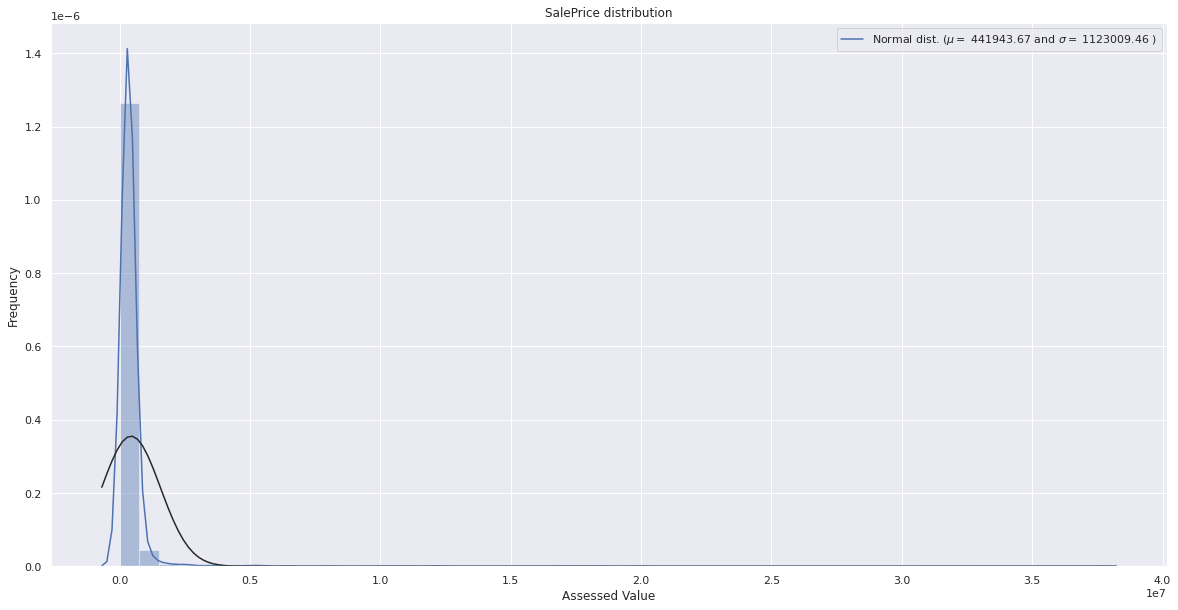

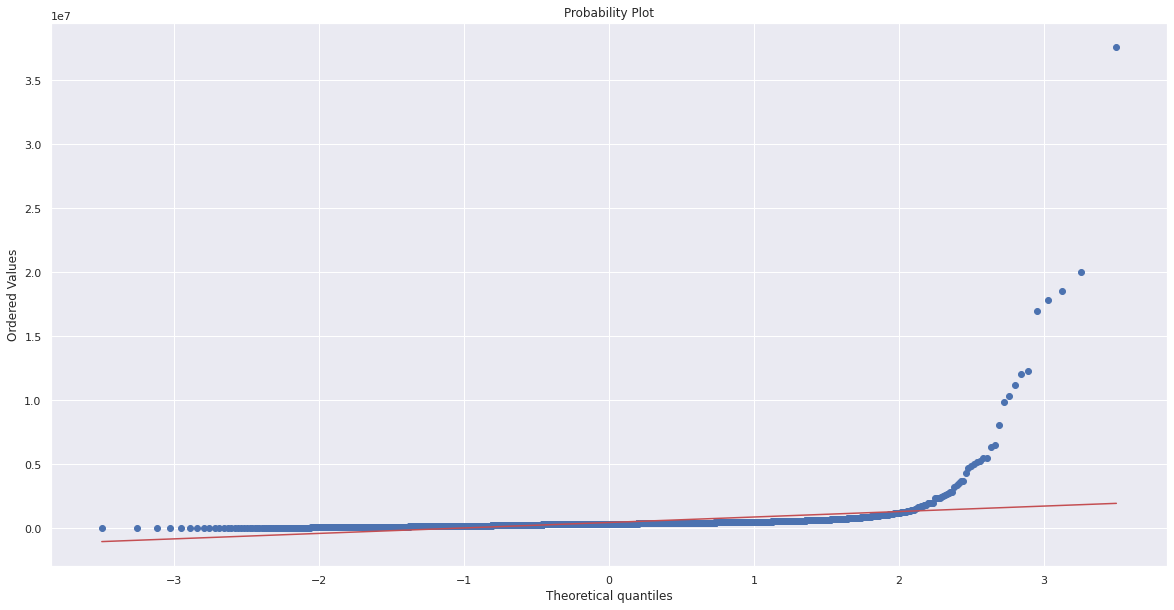

In [88]:
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
sns.distplot(y_train , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y_train)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 12.59 and sigma = 1.09



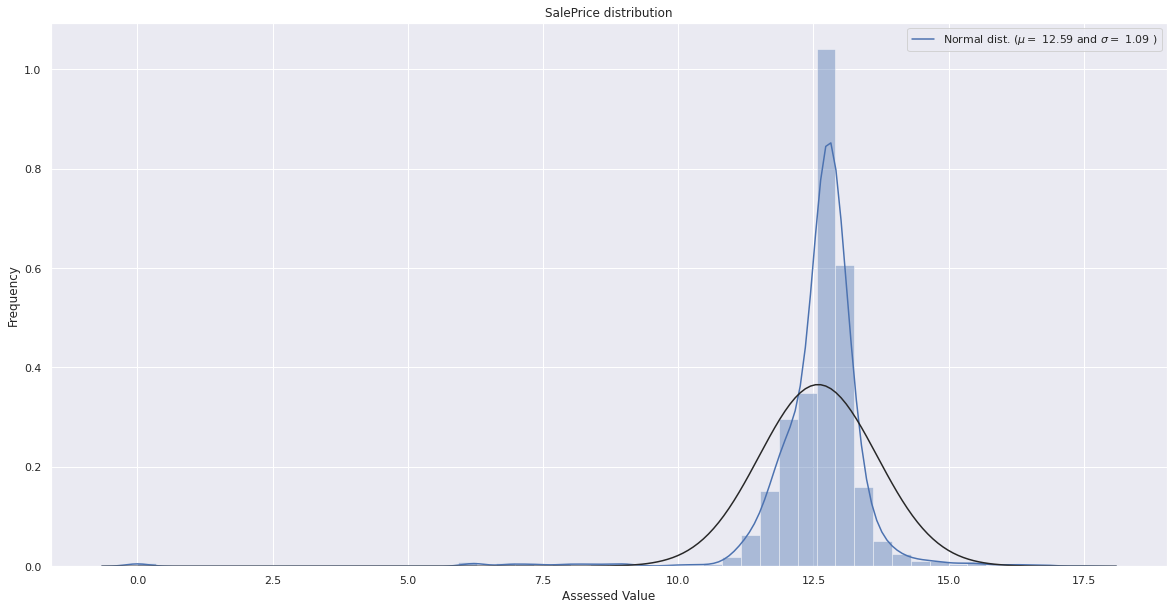

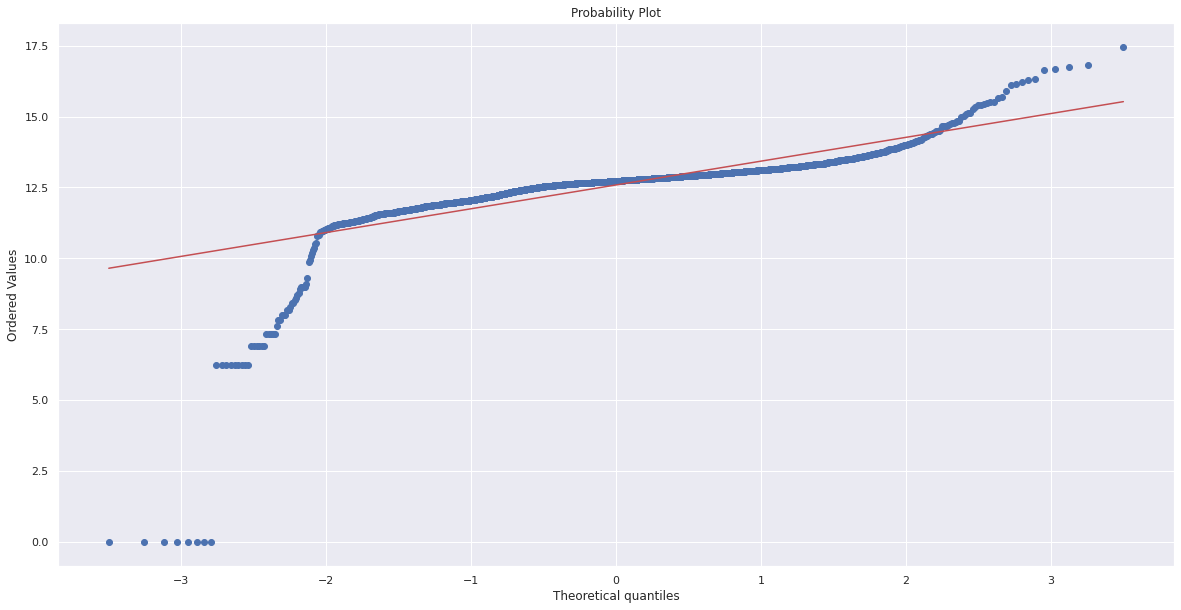

In [89]:
y_train=np.log1p(y_train)

sns.distplot(y_train , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y_train)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)
plt.show()

In [79]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as mse
linreg=LinearRegression()
logreg=LogisticRegression()
svr=SVR(kernel='linear')
models=[linreg,logreg,svr]

In [90]:
results=[]
for mod in models:
   mod.fit(X_train,y_train)
   pred=mod.predict(X_test)
   score=mse(y_test,pred)
   results.append((mod,score))

results


ValueError: ignored